1. 什么是Random Forest

-----随机森林是一种由决策树构成的集成算法

「REVIEW」决策树 – Decision Tree

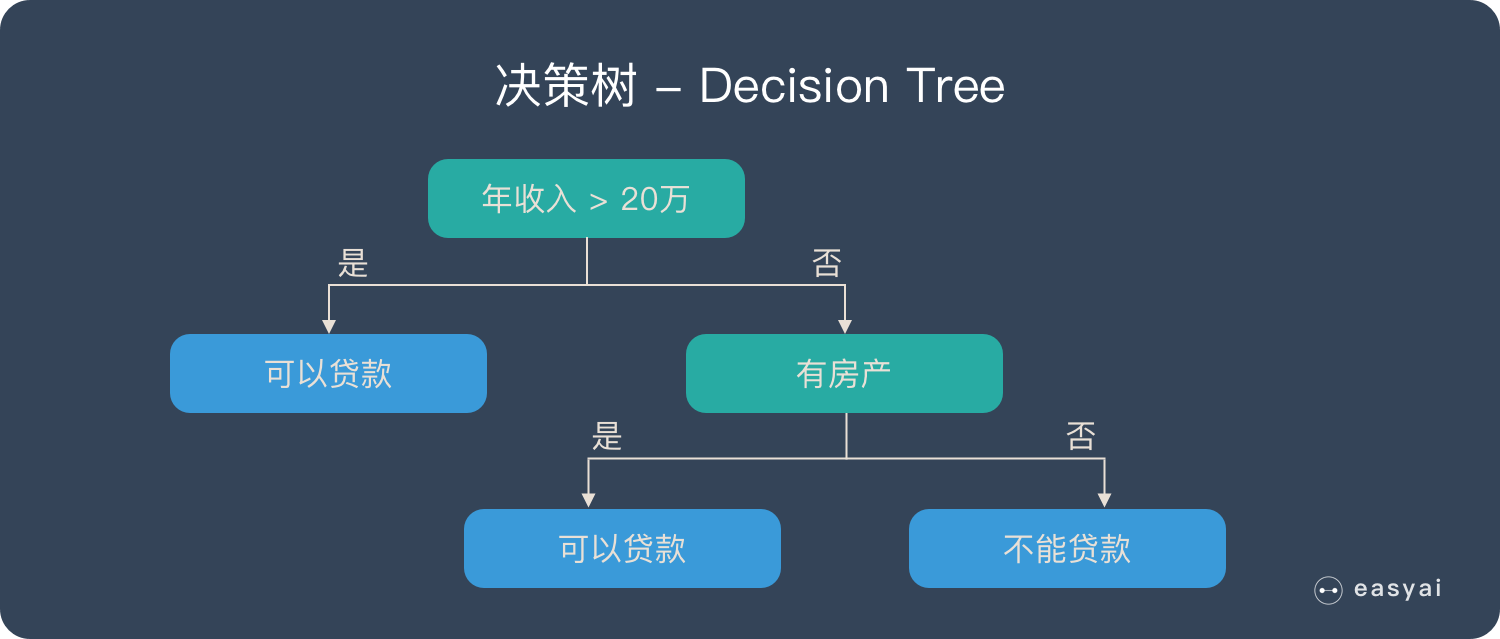

随机森林 – Random Forest | RF

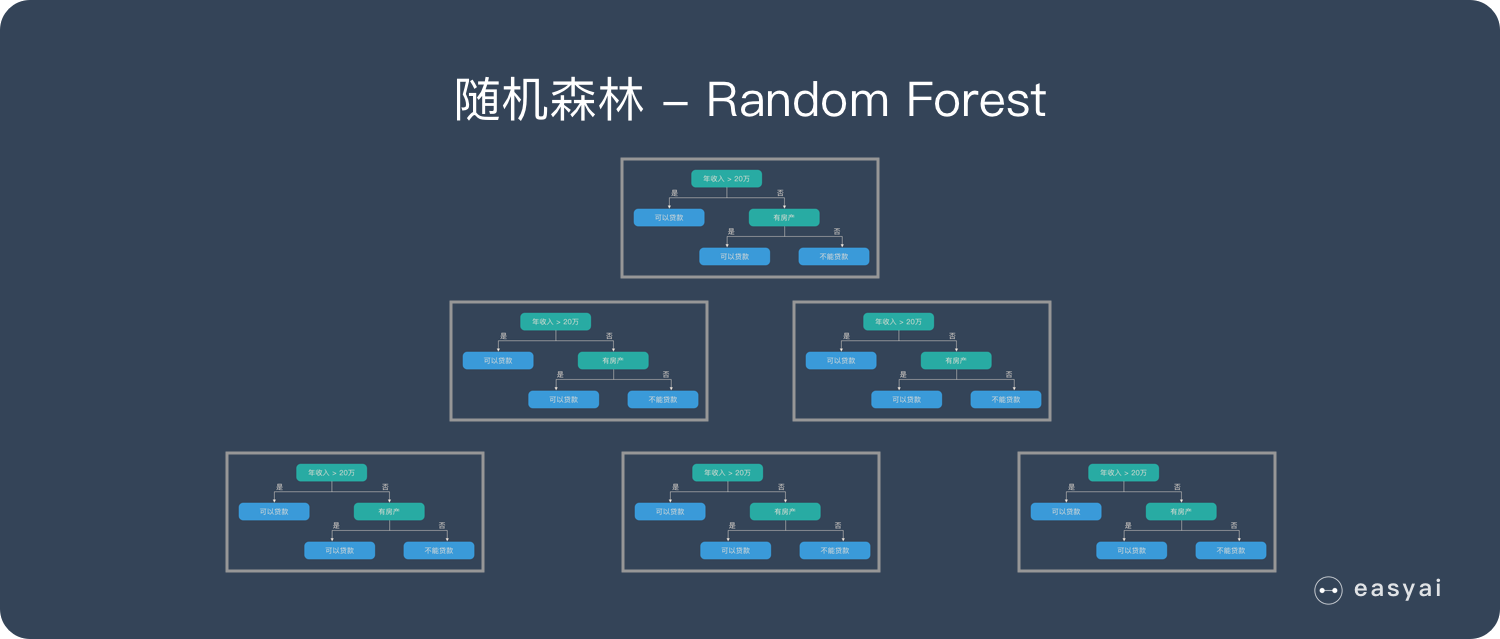

2. 构造随机森林的 4 个步骤

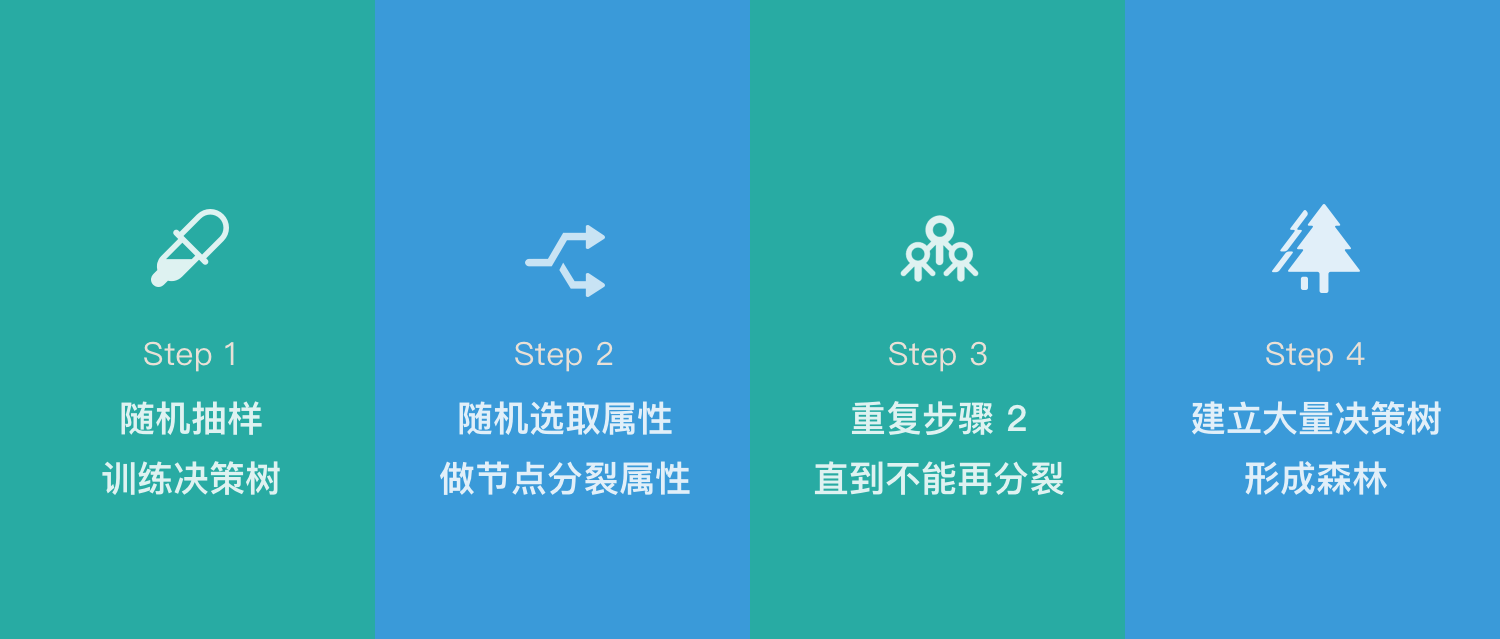

一个样本容量为N的样本，有放回的抽取N次，每次抽取1个，最终形成了N个样本。这选择好了的N个样本用来训练一个决策树，作为决策树根节点处的样本。


当每个样本有M个属性时，在决策树的每个节点需要分裂时，随机从这M个属性中选取出m个属性，满足条件m << M。然后从这m个属性中采用某种策略（比如说信息增益）来选择1个属性作为该节点的分裂属性。


决策树形成过程中每个节点都要按照步骤2来分裂（很容易理解，如果下一次该节点选出来的那一个属性是刚刚其父节点分裂时用过的属性，则该节点已经达到了叶子节点，无须继续分裂了）。一直到不能够再分裂为止。注意整个决策树形成过程中没有进行剪枝。


按照步骤1~3建立大量的决策树，这样就构成了随机森林了。

3. 随机森林的应用方向

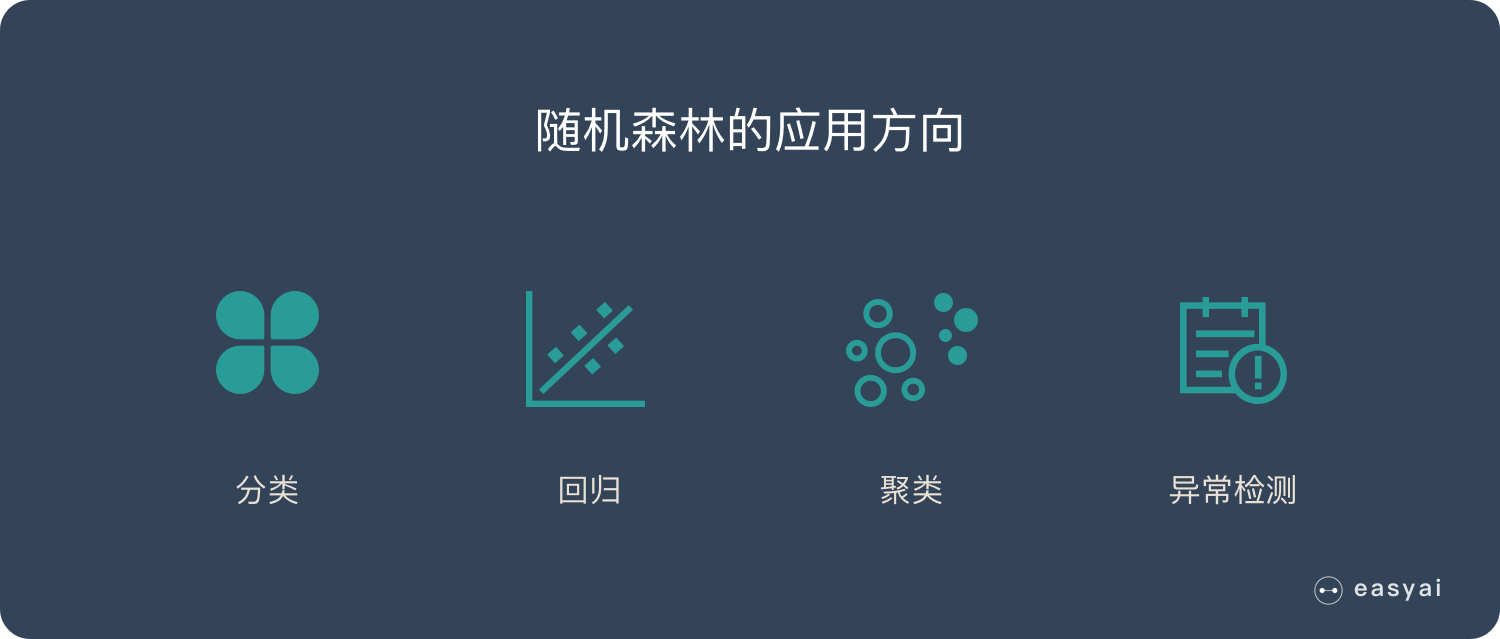

4. 随机森林的优缺点

##### 优点

它可以出来很高维度（特征很多）的数据，并且不用降维，无需做特征选择

它可以判断特征的重要程度

可以判断出不同特征之间的相互影响

不容易过拟合

训练速度比较快，容易做成并行方法

实现起来比较简单

对于不平衡的数据集来说，它可以平衡误差。

如果有很大一部分的特征遗失，仍可以维持准确度。



##### 缺点

随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟合。

对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的


5. 课堂讲解

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Course:             FINS3648

Reference:          Raschka(2015)   

ML package links:   http://scikit-learn.org/stable/index.html

Data Source:        https://github.com/selva86/datasets/blob/master/BostonHousing.csv

Attributes:

        1. CRIM     per capita crime rate by town
        
        2. ZN       proportion of residential land zoned for lots over 
        
                    25,000 sq.ft.
                    
        3. INDUS    proportion of non-retail business acres per town
        
        4. CHAS     Charles River dummy variable (= 1 if tract bounds 
        
                    river; 0 otherwise)
                    
        5. NOX      nitric oxides concentration (parts per 10 million)
        
        6. RM       average number of rooms per dwelling
        
        7. AGE      proportion of owner-occupied units built prior to 1940
        
        8. DIS      weighted distances to five Boston employment centres
        
        9. RAD      index of accessibility to radial highways
        
        10. TAX     full-value property-tax rate per $10,000
        
        11. PTRATIO pupil-teacher ratio by town
        
        12. B       1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
        
                    by town
                    
        13. LSTAT   % lower status of the population
        
        14. MEDV    Median value of owner-occupied homes in $1000's
        



In [4]:
# Load Data Housing in Boston area
df = pd.read_csv("BostonHousing.csv")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
# define basic graphical funcional form
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


In [7]:
# **** NOW move to use RANDOM FOREST****
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# Example from Raschka(2015)
# X = df.iloc[:, :-1].values
X = df[['RM']].values
y = df['MEDV'].values

In [8]:
# Use train_test_split to split the data
# test size 0.4 means you will assign 40% of data to be the testing part.
# random_state 1 means you can run split functions for multiple times but the data splited will be remain the same.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [9]:
# measure how good our model is in terms of predictions as learned form test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Calling the function RandomForestRegressor
# n_estimatorsint, default=100 The number of trees in the forest.
# n_jobs means The number of jobs to run in parallel.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [11]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 6.325, test: 50.921
R^2 train: 0.921, test: 0.436


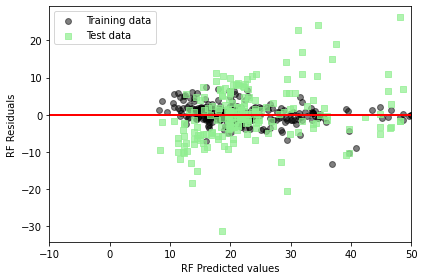

In [14]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='black',
            marker='o',
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='lightgreen',
            marker='s',
            s=35,
            alpha=0.7,
            label='Test data')
plt.xlabel('RF Predicted values')
plt.ylabel('RF Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()


Q&A: How to improve your model?

    1. Data cleaning
    
    2. Data split
    
    3. Cross validation
    
    4. Parameters
    
    5. Combine different models
    
    ...